In [161]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



# Read happy data
undata = pd.read_csv("data/country_profile_variables.csv")
happy_data = pd.read_csv("2017.csv")
undata.head()


,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),...,Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI)
0,Afghanistan,SouthernAsia,652864,35530,54.4,106.3,20270,-2.4,623.2,23.3,...,8.3,42,2.1,9.8/0.3,63,5,78.2/47.0,45.1/27.0,21.43,-99
1,Albania,SouthernEurope,28748,2930,106.9,101.9,11541,2.6,3984.2,22.4,...,63.3,130,28.2,5.7/2.0,84,36,94.9/95.2,95.5/90.2,2.96,-99
2,Algeria,NorthernAfrica,2381741,41318,17.3,102.0,164779,3.8,4154.1,12.2,...,38.2,135,0.8,145.4/3.7,5900,55,84.3/81.8,89.8/82.2,0.05,-99
3,American Samoa,Polynesia,199,56,278.2,103.6,-99,-99,-99.0,-99,...,-99,92,87.9,-99,-99,-99,100.0/100.0,62.5/62.5,-99,-99
4,Andorra,SouthernEurope,468,77,163.8,102.3,2812,0.8,39896.4,0.5,...,96.9,13,34,0.5/6.4,1,119,100.0/100.0,100.0/100.0,-99,-99


In [164]:
internet = undata[["country", "Individuals using the Internet (per 100 inhabitants)"]]
internet = internet.rename(columns={"country": "Country","Individuals using the Internet (per 100 inhabitants)": "Net Users" })
internet['Country'] = internet['Country'].replace({'United States of America': 'United States'})  
count = internet.count()

In [165]:
happy = happy_data[["Country", "Happiness.Rank"]]
happy.head()



,Country,Happiness.Rank
0,Norway,1
1,Denmark,2
2,Iceland,3
3,Switzerland,4
4,Finland,5


In [185]:
happy_internet = pd.merge(happy, internet, on="Country")

happy_internet

,Country,Happiness.Rank,Net Users
0,Norway,1,64
1,Denmark,2,47
2,Iceland,3,27
3,Switzerland,4,74
4,Finland,5,36
5,Netherlands,6,40
6,Canada,7,122
7,New Zealand,8,199
8,Sweden,9,54
9,Australia,10,948


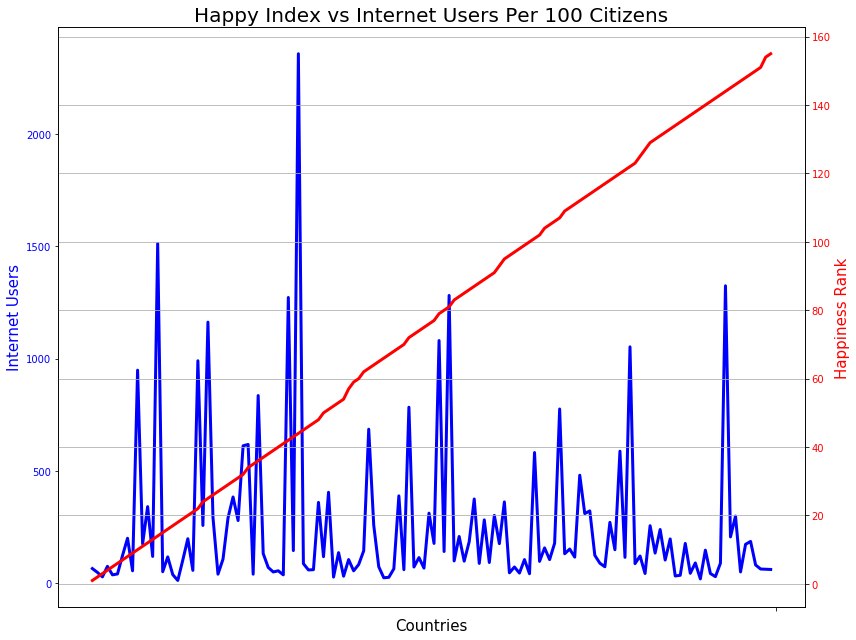

<Figure size 432x288 with 0 Axes>

In [175]:
# Read data in
x_axis = happy_internet["Country"]
internet_stuff = happy_internet["Net Users"]
happy_stuff = happy_internet["Happiness.Rank"]

fig, ax1 = plt.subplots()

# first dataset
color = "blue"
ax1.set_xlabel('Countries', size=15)
ax1.set_ylabel('Internet Users', color=color, size = 15)
ax1.plot(x_axis, internet_stuff, color=color, linewidth=3)
ax1.tick_params(axis='y', labelcolor=color)

#create second axis that shares the same x-axis
ax2 = ax1.twinx()  

# second dataset
color = 'red'
ax2.set_ylabel('Happiness Rank', color=color, size = 15)  # we already handled the x-label with ax1
ax2.plot(x_axis, happy_stuff, color=color, linewidth=3)
ax2.tick_params(axis='y', labelcolor=color)

# all the fun graph stuff
plt.xticks([""])
fig = plt.gcf()
fig.set_size_inches(12, 9)
plt.grid(True)
plt.title("Happy Index vs Internet Users Per 100 Citizens", size = 20)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


plt.savefig("UNDATA_FINAL.png")

In [181]:
happy_internet_top = happy_internet[:20]
countries = happy_internet_top["Country"]
happiness_rank = happy_internet_top["Happiness.Rank"]
net_users_top = happy_internet_top["Net Users"]



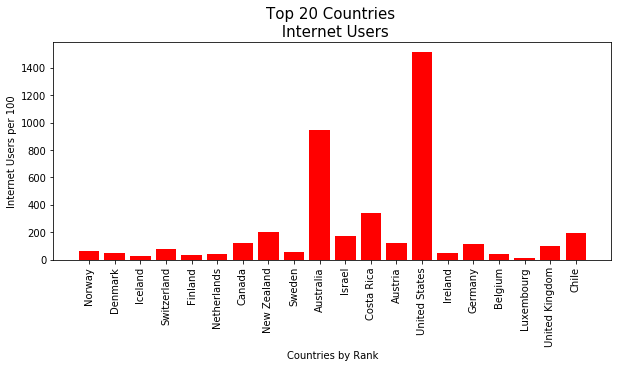

In [180]:
x_axis = happy_internet_top["Country"]


plt.bar(x_axis, net_users_top, color='red')
plt.title("Top 20 Countries \n Internet Users", size = 15)
plt.xlabel("Countries by Rank")
plt.ylabel("Internet Users per 100")
# plt.ylim([0,101])
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10, 4)
# plt.savefig("water_top.png")

In [186]:
happy_internet_bottom = happy_internet[115:135]
countries = happy_internet_bottom["Country"]
happiness_rank = happy_internet_bottom["Happiness.Rank"]
net_users_bottom = happy_internet_bottom["Net Users"]

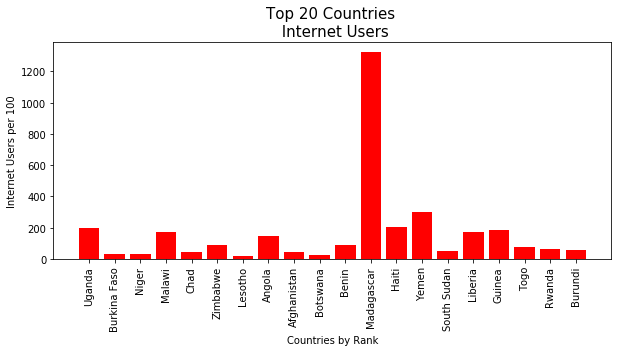

In [187]:
x_axis = happy_internet_bottom["Country"]


plt.bar(x_axis, net_users_bottom, color='red')
plt.title("Top 20 Countries \n Internet Users", size = 15)
plt.xlabel("Countries by Rank")
plt.ylabel("Internet Users per 100")
# plt.ylim([0,101])
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10, 4)
# plt.savefig("water_top.png")

In [191]:
net_top = happy_internet_top["Net Users"]
net_bottom = happy_internet_bottom["Net Users"]
top_avg = net_top.mean()
bottom_average = net_bottom.mean()
averages = [top_avg, bottom_average]

In [192]:
summary_net = pd.DataFrame({"Top Happy Average" : [top_avg],"Bottom Happy Average ": [bottom_average]})
summary_net

,Top Happy Average,Bottom Happy Average
0,213.45,166.35


In [150]:
urban = undata[["country", "Urban population (% of total population)"]]
urban = urban.rename(columns={"country": "Country","Urban population (% of total population)": "Urban Pop" })
urban['Country'] = urban['Country'].replace({'United States of America': 'United States'}) 

In [172]:
happy_urban = pd.merge(happy, urban, on="Country")


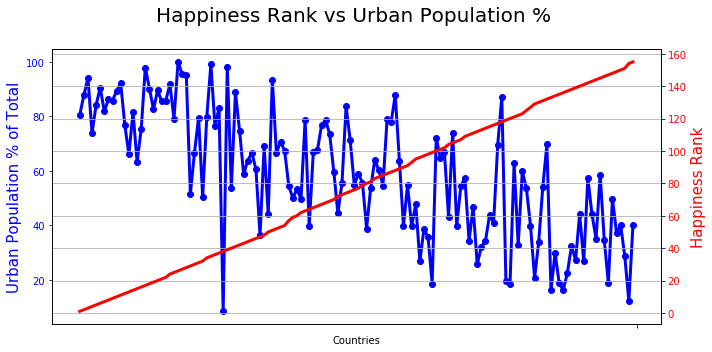

<Figure size 432x288 with 0 Axes>

In [160]:
# Read data in
x_axis = happy_urban["Country"]
urban_data = happy_urban["Urban Pop"]
happy_data = happy_urban["Happiness.Rank"]

fig, ax1 = plt.subplots()

# first dataset
color = "blue"
ax1.set_xlabel('Countries')
ax1.set_ylabel('Urban Population % of Total', color=color, size = 15)
ax1.plot(x_axis, urban_data, color=color, linewidth=3, marker="o")
ax1.tick_params(axis='y', labelcolor=color)

#create second axis that shares the same x-axis
ax2 = ax1.twinx()  

# second dataset
color = 'red'
ax2.set_ylabel('Happiness Rank', color=color, size = 15)  # we already handled the x-label with ax1
ax2.plot(x_axis, happy_data, color=color, linewidth=3, )
ax2.tick_params(axis='y', labelcolor=color)

# all the fun graph stuff
plt.xticks([""])
fig = plt.gcf()
fig.set_size_inches(10, 5)
plt.grid(True)
plt.title("Happiness Rank vs Urban Population % \n", size = 20)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


plt.savefig("UNDATA_FINAL.png")

In [153]:
happy_urban_top = happy_urban[:20]
happy_urban_top_avg = happy_urban_top["Urban Pop"].mean()
happy_urban_bottom = happy_urban[115:135]
happy_urban_bottom_avg = happy_urban_bottom["Urban Pop"].mean()
happy_urban_bottom_avg

32.515

In [171]:
urban_average_df = pd.DataFrame({"Top Happy Average" : [happy_urban_top_avg],"Bottom Happy Average ": [happy_urban_bottom_avg]}) 
urban_average_df

,Top Happy Average,Bottom Happy Average
0,83.47,32.515
